# Heap

# Introdução

> Um heap támbem conhecido como fila de prioridade trata-se de um vetor ou array ordenado de modo ao elemento da primeira posição do vetor seja maior que demais elementos, no caso de MaxHeap, ou seja o menor elemento do array caso trata-se de um MinHeap. Visualizando o heap de forma gráfica pode-se vê-lo montado como uma árvore binária podendo ter até dois filhos de menor valor que o nó atual.

## Propriedades

> - Forma uma árvore completa, onde todos os nivéis estao completamente cheios com exeção dos nós folhas. 
- Um heap binário pode ser tanto um MinHeap quanto um MaxHeap. No MinHeap o nó raiz é o valor minimo presente quanto aos demais do vetor e no MaxHeap é o valor máximo.
> - A raiz estará na posição 0(zero) do vetor;
- A posição nó pai de do nó $i$ é dado por: 
\begin{equation}
vetor[(i-1)/2]
\end{equation}
- A posição do nó da esquerda de $i$ é dado por: 
\begin{equation}
vetor[(2*i)+1]
\end{equation}
- A posição do nó da direita de $i$ é dado por: 
\begin{equation}
vetor[(2*i)+2]
\end{equation}
Onde $i$ representa um nó do vetor.

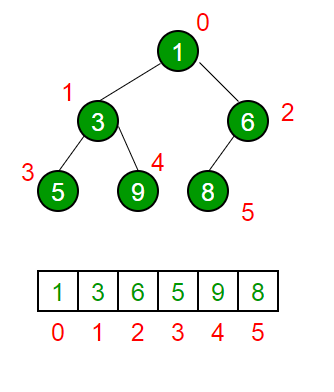

## Complexidade de Tempo

> Heapify com um único nó tem em complixidade de tempo de $O(LogN)$ onde $N$ é número total de nós. Em contrapartida, heap com uma entrada maior de dados possui uma complexidade de tempo dada por $O(NLogN)$.

## Desenvolvimento

> Para construção de um heap com $N$ elementos, onde estes elementao serão inseridos e medido o tempo de inserção foi utilizado os de duas funções sendo elas: 
> ### $fixup()$ 
Realiza a ordenação do heap com uma abordagem BottonUp, ou seja, do último elemento do vetor para o primeiro elemento. A função fixup possui dois parâmetros $heap\_list$ que se trata de um vetor e $position$ que se trata de uma posição deste vetor.
É formada por um laço de repetição $while$ que é realizado ate que se chegue a raiz do heap ou posição zero do vetor, caso o valor do nó na posição atual seja menor que o valor do nó na posição pai é realizado a troca de ambos valor e o laço de repetição continua.


In [1]:
#biblioteca math para uso da função ceil
import math

#a função fixup possui dois parâmetros heap_list que se trata de um vetor e position que se trata de uma
#posição deste vetor
def fixup(heap_list, position):
    while math.ceil(position / 2) > 0:
        #verifica se o elemento na posição atual é menor que o elemento na posição pai
        if heap_list[position] < heap_list[position // 2]:
            #caso seja é feita a troca de posição dos elementos
            aux = heap_list[position // 2]
            heap_list[position // 2] = heap_list[position]
            heap_list[position] = aux
        position = position // 2

> ### $insert()$ 
Realiza uma inserção no final do array com auxilio do método $append()$ do classe $list$ e após esta inserção é realizado a ordenação no heap com auxílio do método $fixup$ que é inciado a partir da ultima posição do vetor

In [2]:
def insert(heap_list, value):
    #insere um valor no final da lista
    heap_list.append(value)
    #chama o método fixup passando como parâmetro o heap_list e a ultima posicao dele
    fixup(heap_list, len(heap_list)-1)

> ### $create\_heap()$
Metódo principal do algoritimo, através dele com auxilio da função $randon()$ é gerando um heap de $tamanho$ dado, onde atravéz de um laço de repetições $for()$ onde a cada iteração é adicionado a lista um $value$ aleatório com uso do método $insert()$.
A biblioteca $timeit$ é utilizada para calcular o tempo de execução do algoritmo a cada inserção de um valor ($value$), este tempo é armazenado em uma lista $time\_list$ a cada $relax$, variável que indica de quanto em quantos valores do heap sera armazenado na lista $num\_list$ e terá seu tempo de inserção armazenado em $time\_list$.


In [3]:
import random
import timeit
import time

tamanho = 10000
relax = 100

heap = []
time_list = []
num_list = []


def create_heap():
    for x in range(tamanho):
        value = random.randint(0,1000)
        
        #start = time.time()
        insert(heap,value)
        #end = time.time()
        
        if x%relax == 0:
            num_list.append(x)
            
            tempo = timeit.timeit("insert(heap,value)", "from __main__ import insert", number=0)
            time_list.append((tempo*1000000))
            #time_list.append((end-start)*1000000)
        
create_heap()
    
tempo_op1 = timeit.timeit("create_heap()", "from __main__ import create_heap", number=0)
print(tempo_op1)

6.250011210795492e-07


## Visualização

> Impressão dos 10 primeiros tempos adicionados na $time\_list$

In [4]:
print(time_list[:10])

[1.5440000424860045, 1.0659987310646102, 1.460999556002207, 1.275000613532029, 1.3079989003017545, 1.1789998097810894, 1.1780011845985427, 1.6969988791970536, 1.8829996406566352, 1.1660013115033507]


> Tamanho total da $time\_list$ e uma lista com os 10 menores tempos de execução

In [5]:
print(len(time_list))
print(sorted(time_list[:10]))

100
[1.0659987310646102, 1.1660013115033507, 1.1780011845985427, 1.1789998097810894, 1.275000613532029, 1.3079989003017545, 1.460999556002207, 1.5440000424860045, 1.6969988791970536, 1.8829996406566352]


> Lista com os 10 maiores tempos de execução

In [6]:
print(sorted(time_list, reverse=True)[:10])

[1.8829996406566352, 1.6969988791970536, 1.5440000424860045, 1.460999556002207, 1.3079989003017545, 1.275000613532029, 1.2359996617306024, 1.1789998097810894, 1.1780011845985427, 1.1660013115033507]


## Visualização Gráfica
> Com uso da biblioteca grafica matplotlib é possivel montar o gráfico dos valores armazenados nas listas $num\_list$ e $time\_list$

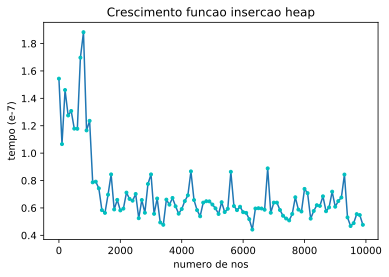

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format='svg'
#%config InlineBackend.rc={'figure.figsize': (12, 20)}
#%config InlineBackend.figure_format='retina'

plt.plot(num_list, time_list)
plt.plot(num_list, time_list, 'c.')
plt.title('Crescimento funcao insercao heap') #adicionando o título
plt.xlabel('numero de nos')
plt.ylabel('tempo (e-7)')
plt.savefig("cresc.svg", format="svg")
plt.show()

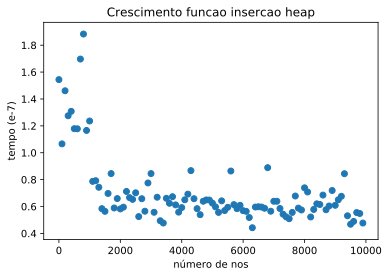

In [8]:
plt.scatter(num_list, time_list)
plt.title('Crescimento funcao insercao heap') #adicionando o título
plt.xlabel('número de nos')
plt.ylabel('tempo (e-7)')
plt.show()

## Conclusão

> A inserção no heap apesar de ser relativamente rápida com complexidade $O(nLogn)$ para determinado $n$, tal que $n$ seja o número de nós no heap, podemos notar que dependendo do valor $x$, onde $x$ seja um valor para inserção no heap, a inserção pode ser tornar lenta devido a necessidade de percorrer boa parte do vetor afim de reajustar sua ordenação.

## Bibliografia
> - 16.05.2019[00:15] - https://www.geeksforgeeks.org/binary-heap/
- 16.05.2019[00:15] - https://www.geeksforgeeks.org/dijkstras-algorithm-for-adjacency-list-representation-greedy-algo-8/
- 16.05.2019[00:15] - https://www.geeksforgeeks.org/heap-sort/
- 16.05.2019[00:15] - http://www.cs.sfu.ca/CourseCentral/307/petra/2009/SLN_2.pdf
- 16.05.2019[00:15] - https://docs.python.org/3/
- 16.05.2019[00:15] - https://matplotlib.org